In [2]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import dates as mpl_dates
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import pytz
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import pearsonr
random.seed(123)
import requests
import os


In [2]:
# data_dictionary = dict()
def authenticate_and_request(APITocken, APPType, request_body):
    # API endpoint URL (replace with the actual API endpoint)
    api_url = 'https://echt.seelive.io/API/DataAI/API_GetSensorData'

    # Construct headers with authentication tokens
    headers = {
        'Authorization': f'Bearer {APITocken}',
        'APITocken': APITocken,
        'APPType': APPType
    }

    try:
        # Send POST request to the API with request body
        response = requests.post(api_url, headers=headers, json=request_body)

        # Check for successful response (status code 200)
        if response.status_code == 200:
            data = response.json()  # Assuming the API returns JSON data
            print('API Response:')
            return data
#             print(data)
#             return data_dictionary.update(data)
        else:
            print(f'Error: HTTP Status Code {response.status_code}')
            print(response.text)  # Print the response content for debugging

    except Exception as e:
        print(f'Error: {e}')

In [3]:
ug_data_list = []
for i in ['ENE00933', 'ENE00960', 'ENE00950']:
    APITocken='Rth-0987u-wert-3456'
    APPType='AIUSER'

    # Define the start and end date strings------------------------------------------------------
    start_date = datetime(2023, 8, 23, 0, 0)
    end_date = datetime(2023, 8, 27, 23, 59)

    # Define a custom datetime format
    custom_format = "%d-%b-%Y %I:%M %p"


    # Format the datetime objects using the custom format
    start_date_str = start_date.strftime(custom_format)
    end_date_str = end_date.strftime(custom_format)

    print(start_date_str)
    print(end_date_str)

    request_body =  {
        "SensorID":i,
         "FromDate":start_date_str,
         "ToDate":end_date_str,
         "DataInteval":1,
         "DataType":"R"
    }

    data = authenticate_and_request(APITocken, APPType, request_body)
    
    df = pd.DataFrame(data['SearchDetail'])
    
    # Drop columns with all zeroes
    New_df_one = df.loc[:, (df != 0).any(axis=0)]
    ug_data_list.append(New_df_one)

23-Aug-2023 12:00 AM
27-Aug-2023 11:59 PM
API Response:
23-Aug-2023 12:00 AM
27-Aug-2023 11:59 PM
API Response:
23-Aug-2023 12:00 AM
27-Aug-2023 11:59 PM
API Response:


In [4]:
# Define a function to convert a string to a timezone-aware datetime object
def convert_to_datetime_with_timezone(date_string):
    datetime_object = datetime.fromisoformat(date_string)
    datetime_object = datetime_object.replace(tzinfo=pytz.UTC)
    return datetime_object

In [5]:
for i in ug_data_list:
    # i['DataDate'] = df['DataDate'].apply(lambda x: convert_to_datetime_with_timezone(x))
    i.loc[:, 'DataDate'] = pd.to_datetime(i['DataDate'])

In [6]:
df_ENE00933 = ug_data_list[0].copy()
df_ENE00960 = ug_data_list[1].copy()
df_ENE00950 = ug_data_list[2].copy()

# df_ENE00933.drop(columns=['DeviceID'], inplace=True)
df_ENE00933

,DataDate,DeviceID,PM2_5,PM10,SOX,NOX,Temp,Hum
0,2023-08-23 05:30:00,ENE00933,9.0,10.0,555.89,47.930,0.0,0.00
1,2023-08-23 05:31:00,ENE00933,9.0,10.0,551.16,48.090,0.0,0.00
2,2023-08-23 05:32:00,ENE00933,9.0,10.0,532.57,49.650,0.0,0.00
3,2023-08-23 05:33:00,ENE00933,9.0,10.0,531.71,49.520,0.0,0.00
4,2023-08-23 05:34:00,ENE00933,8.0,9.0,537.43,49.680,0.0,0.00
...,...,...,...,...,...,...,...,...
6860,2023-08-28 05:24:00,ENE00933,4.5,5.0,564.26,48.295,21.1,99.24
6861,2023-08-28 05:25:00,ENE00933,5.0,6.0,568.25,48.440,21.1,99.12
6862,2023-08-28 05:26:00,ENE00933,6.0,6.0,570.12,49.070,21.1,99.54
6863,2023-08-28 05:27:00,ENE00933,6.0,6.0,580.20,49.070,21.1,99.75


In [7]:

# Assuming start_date and end_date are strings
start_date = '2023-08-25 00:00:00'
end_date = '2023-08-26 23:59:00'

# Convert start_date and end_date to Timestamp objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Perform the comparison
subset_df = df_ENE00933[(df_ENE00933['DataDate'] >= start_date) & (df_ENE00933['DataDate'] <= end_date)].reset_index(drop=True)
subset_df.to_csv('df_ENE00933.csv', index=False)  # Set index=False to exclude the index column in the CSV file
subset_df


,DataDate,DeviceID,PM2_5,PM10,SOX,NOX,Temp,Hum
0,2023-08-25 00:00:00,ENE00933,11.0,13.0,563.42,47.85,0.0,0.0
1,2023-08-25 00:01:00,ENE00933,10.0,11.0,542.59,49.84,0.0,0.0
2,2023-08-25 00:02:00,ENE00933,10.0,11.0,554.44,48.55,0.0,0.0
3,2023-08-25 00:03:00,ENE00933,12.0,13.0,560.85,48.28,0.0,0.0
4,2023-08-25 00:04:00,ENE00933,12.0,14.0,565.09,47.48,0.0,0.0
...,...,...,...,...,...,...,...,...
2718,2023-08-26 23:55:00,ENE00933,9.0,10.0,618.77,45.79,22.1,100.0
2719,2023-08-26 23:56:00,ENE00933,8.0,9.0,617.78,46.65,22.1,100.0
2720,2023-08-26 23:57:00,ENE00933,8.0,9.0,617.16,46.85,22.1,100.0
2721,2023-08-26 23:58:00,ENE00933,8.0,9.0,609.85,48.03,22.1,100.0


In [8]:
# subset_df.to_csv('subset_df.csv', index=False)  # Set index=False to exclude the index column in the CSV file

In [4]:
subset_df.shape

## Load Teledyne data

In [5]:
df_T640 = pd.read_csv('T640_Sensor_Data.csv', parse_dates=['DataDate'])
df_T640

,DataDate,PM2.5,SRHUM,STEMP,TEMP
0,2023-08-26 23:58:00,7.854779,34.96513,40.750,24.81177
1,2023-08-26 23:57:00,7.933205,35.13075,40.750,24.82607
2,2023-08-26 23:56:00,7.938008,35.17448,40.625,24.83507
3,2023-08-26 23:55:00,7.962260,34.96665,40.750,24.81804
4,2023-08-26 23:54:00,8.023484,35.00947,40.750,24.84772
...,...,...,...,...,...
2873,2023-08-25 00:05:00,18.030820,35.06934,40.750,24.46597
2874,2023-08-25 00:04:00,17.999780,35.03533,40.750,24.46844
2875,2023-08-25 00:03:00,17.820860,34.91036,40.750,24.41918
2876,2023-08-25 00:02:00,17.859630,35.03592,40.750,24.45149


## Merge Teledyne with sensor data

In [6]:
def resample_and_merge_csv(file1_path, file2_path):
    # Read the CSV files into DataFrames
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)
    # df2 =file2_path

    # Convert the date columns to DataDate objects
    df1['DataDate'] = pd.to_datetime(df1['DataDate'])
    df2['DataDate'] = pd.to_datetime(df2['DataDate'])

    # Set the date column as the index for resampling
    df1.set_index('DataDate', inplace=True)
    df2.set_index('DataDate', inplace=True)

    # Resample both DataFrames from seconds to minutes, using the mean
    df1 = df1.resample('T').mean().dropna()
    df2 = df2.resample('T').mean().dropna()

    # Inner merge the two DataFrames based on the date index
    merged_df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')
    return merged_df, merged_df.isnull().sum()

In [57]:
file1 = 'T640_Sensor_Data.csv'
file2 = 'EN00933_Sensor_Data.csv'

merge_csv, merged_csv_missing_values = resample_and_merge_csv(file1, file2)
print(merged_csv_missing_values)
merge_csv.reset_index(inplace=True)
merge_csv = merge_csv.drop(['PM10', 'SOX', 'NOX', 'SRHUM', 'STEMP', 'TEMP'], axis=1)
merge_csv

PM2.5    0
SRHUM    0
STEMP    0
TEMP     0
PM2_5    0
PM10     0
SOX      0
NOX      0
Temp     0
Hum      0
dtype: int64


,DataDate,PM2.5,PM2_5,Temp,Hum
0,2023-08-25 06:01:00,18.075560,28.0,0.0,0.0
1,2023-08-25 06:02:00,18.321170,26.0,0.0,0.0
2,2023-08-25 06:03:00,18.427290,26.0,0.0,0.0
3,2023-08-25 06:04:00,18.446250,29.0,0.0,0.0
4,2023-08-25 06:05:00,18.591270,26.0,0.0,0.0
...,...,...,...,...,...
1582,2023-08-26 10:36:00,8.342191,5.0,24.0,91.0
1583,2023-08-26 10:37:00,8.258985,4.0,24.0,90.0
1584,2023-08-26 10:38:00,8.177133,5.0,23.9,91.0
1585,2023-08-26 10:39:00,8.153947,5.0,24.0,91.0


## Save Merged Data to CSV

In [58]:
path = os.path.dirname(os.path.abspath("__file__"))
file_path = f'{path}/merged_data.csv'
merge_csv.to_csv(file_path, index=False)  # Set index=False to exclude the index column in the CSV file


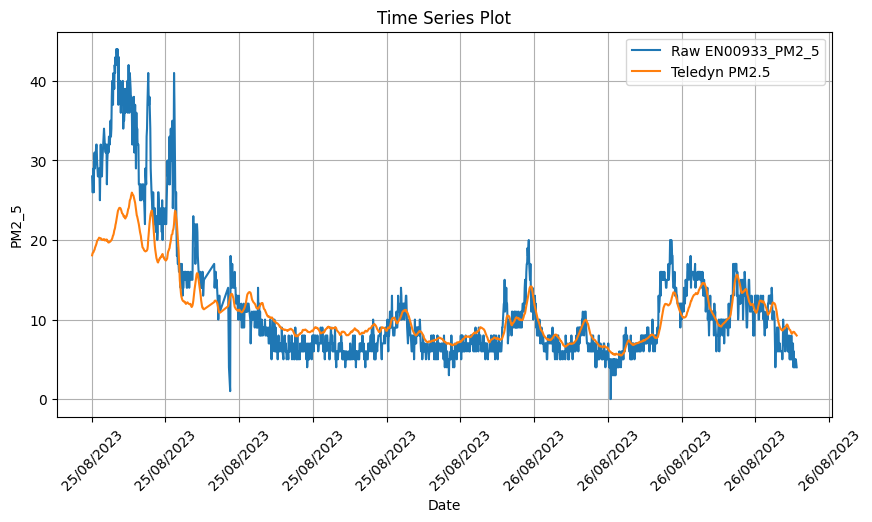

In [61]:
def plot_line_chart(df, sensor_id):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df['DataDate'], y=df['PM2_5'], label=f'Raw {sensor_id}_PM2_5')
    sns.lineplot(x=df['DataDate'], y=df['PM2.5'], label='Teledyn PM2.5')

    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('PM2_5')
    plt.grid(True)
    plt.legend()

    # Format the date on the x-axis to show hours and minutes (H:S)
    date_format = DateFormatter("%d/%m/%Y")
    plt.gca().xaxis.set_major_formatter(date_format)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()
plot_line_chart(merge_csv, 'EN00933')

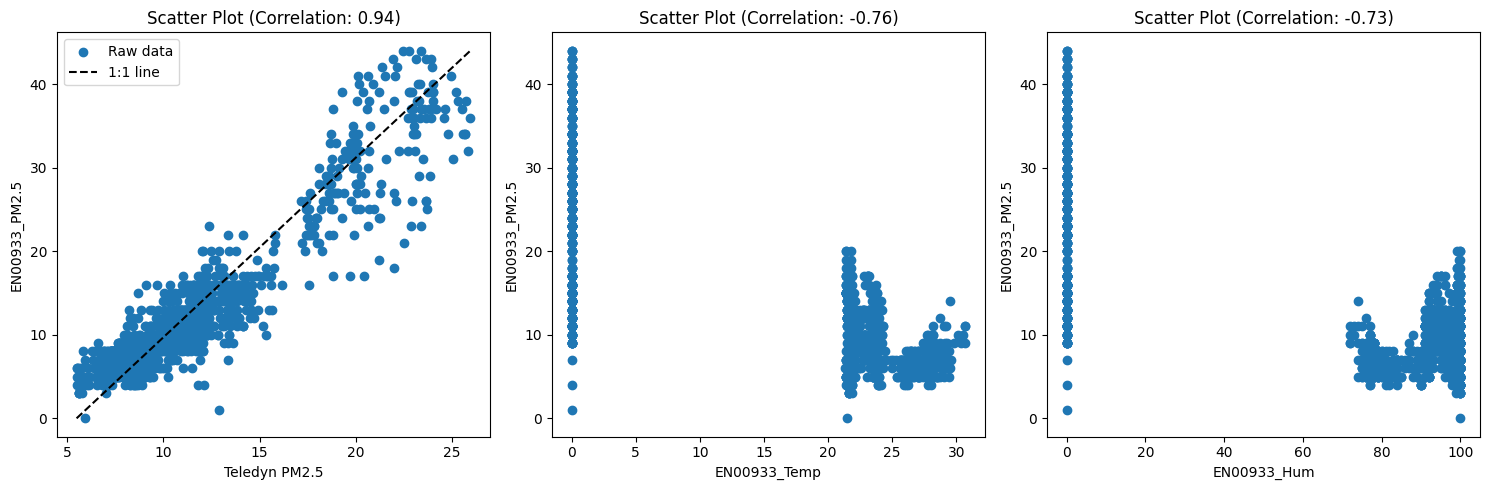

In [62]:
def correlation_scatter_plot_fxn(df, sensor_id):
    correlation_PM2_5 = df['PM2_5'].corr(df['PM2.5'])
    correlation_PM2_5_and_Temp = df['PM2_5'].corr(df['Temp'])
    correlation_PM2_5_and_Hum = df['PM2_5'].corr(df['Hum'])
    correlation_TEMP_and_Temp = df['PM2_5'].corr(df['Hum'])
    

    # Create a figure with three subplots in one row and three columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the first scatter plot
    axes[0].scatter(df['PM2.5'], df['PM2_5'], label='Raw data')
    axes[0].plot([min(df['PM2.5']), max(df['PM2.5'])], [min(df['PM2_5']), max(df['PM2_5'])],
                 color='black', linestyle='--', label='1:1 line')
    axes[0].set_xlabel('Teledyn PM2.5')
    axes[0].set_ylabel(f'{sensor_id}_PM2.5')
    axes[0].set_title(f'Scatter Plot (Correlation: {correlation_PM2_5:.2f})')
    axes[0].legend()

    # Plot the second scatter plot
    axes[1].scatter(df['Temp'], df['PM2_5'])
    axes[1].set_xlabel(f'{sensor_id}_Temp')
    axes[1].set_ylabel(f'{sensor_id}_PM2.5')
    axes[1].set_title(f'Scatter Plot (Correlation: {correlation_PM2_5_and_Temp:.2f})')

    # Plot the third scatter plot
    axes[2].scatter(df['Hum'], df['PM2_5'])
    axes[2].set_xlabel(f'{sensor_id}_Hum')
    axes[2].set_ylabel(f'{sensor_id}_PM2.5')
    axes[2].set_title(f'Scatter Plot (Correlation: {correlation_PM2_5_and_Hum:.2f})')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()


    #     plt.scatter(df['Temp'], df['TEMP'])
    #     plt.xlabel('Sensor Temp')
    #     plt.ylabel('Teledyne TEMP')
    #     plt.title(f'Scatter Plot (Correlation: {correlation_TEMP_and_Temp:.2f})')
    #     plt.show()

correlation_scatter_plot_fxn(merge_csv, 'EN00933')

In [ ]:
merge_csv.drop(columns=['DataDate'], inplace=True)

In [ ]:
corr_matrix = merge_csv.corr()
corr_matrix['PM2.5']

PM2.5    1.000000
PM2_5    0.936813
Temp    -0.744237
Hum     -0.761760
Name: PM2.5, dtype: float64